Welcome to the BDdb tutorial!  This interactive guide will help you understand how to use the `BDdb.py` library and the `BDNYC.db` database in your own project.  First, let's do some housekeeping so we can see some pretty graphs:

In [1]:
%matplotlib inline

And some imports

In [2]:
import BDdb
import os
import matplotlib.pyplot as plt

/usr/local/var/pyenv/versions/anaconda-2.2.0/lib/python2.7/site-packages/pysynphot/locations.py:74: UserWarning: Extinction files should be moved to $PYSYN_CDBS/extinction for compatibility with future versions of pysynphot.
  warnings.warn('Extinction files should be moved to '


Pass in the location of the BDdb file to this notebook: `BDDB_FILE=/some/path ipython notebook`

In [3]:
bddb_path = os.environ['BDDB_FILE']
db = BDdb.get_db(bddb_path)

In [4]:
data = db.query.execute("""
SELECT s.spectral_type,
  p1.magnitude - p2.magnitude
FROM spectral_types AS s
JOIN photometry AS p1
  ON s.source_id = p1.source_id
JOIN photometry AS p2
  ON s.source_id = p2.source_id
WHERE p1.band   = 'J'
  AND p1.system = 2
  AND p2.band   = 'Ks'
  AND p2.system = 2
  AND s.spectral_type BETWEEN 6 AND 32
""").fetchall()

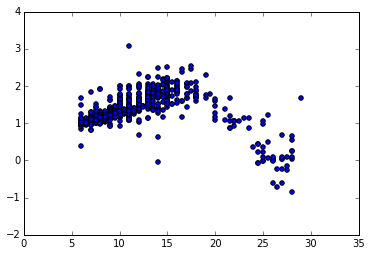

In [5]:
plt.scatter(*zip(*data))